# This notebook is for me an exercise to learn Machine Learning. I am following the tutorials from 'Hands on machine learning with scikit-learn and tensorflow', doing its exercises and trying to expand it with my own ideas. 

In [1]:
#check current directory
%cd
#change working directory where the file is
%cd ~\Desktop\Book_ML_deepL

C:\Users\EAMC
C:\Users\EAMC\Desktop\Book_ML_deepL


### First, let us familiarize with the dataset

In [47]:
#in alternative manual download, then use pd
import pandas as pd
import csv as csv

df= pd.read_csv('housing.csv', sep=',')
df.head(5)
#in alternative, read data from url (nb raw version)
#url="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
#df=pd.read_csv(url)
#df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#check variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#ocean_proximity is not a numerical attribute. With value_counts() I count the level of the column, which is a Pandas Series obj
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
#summary of numerical attributes
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


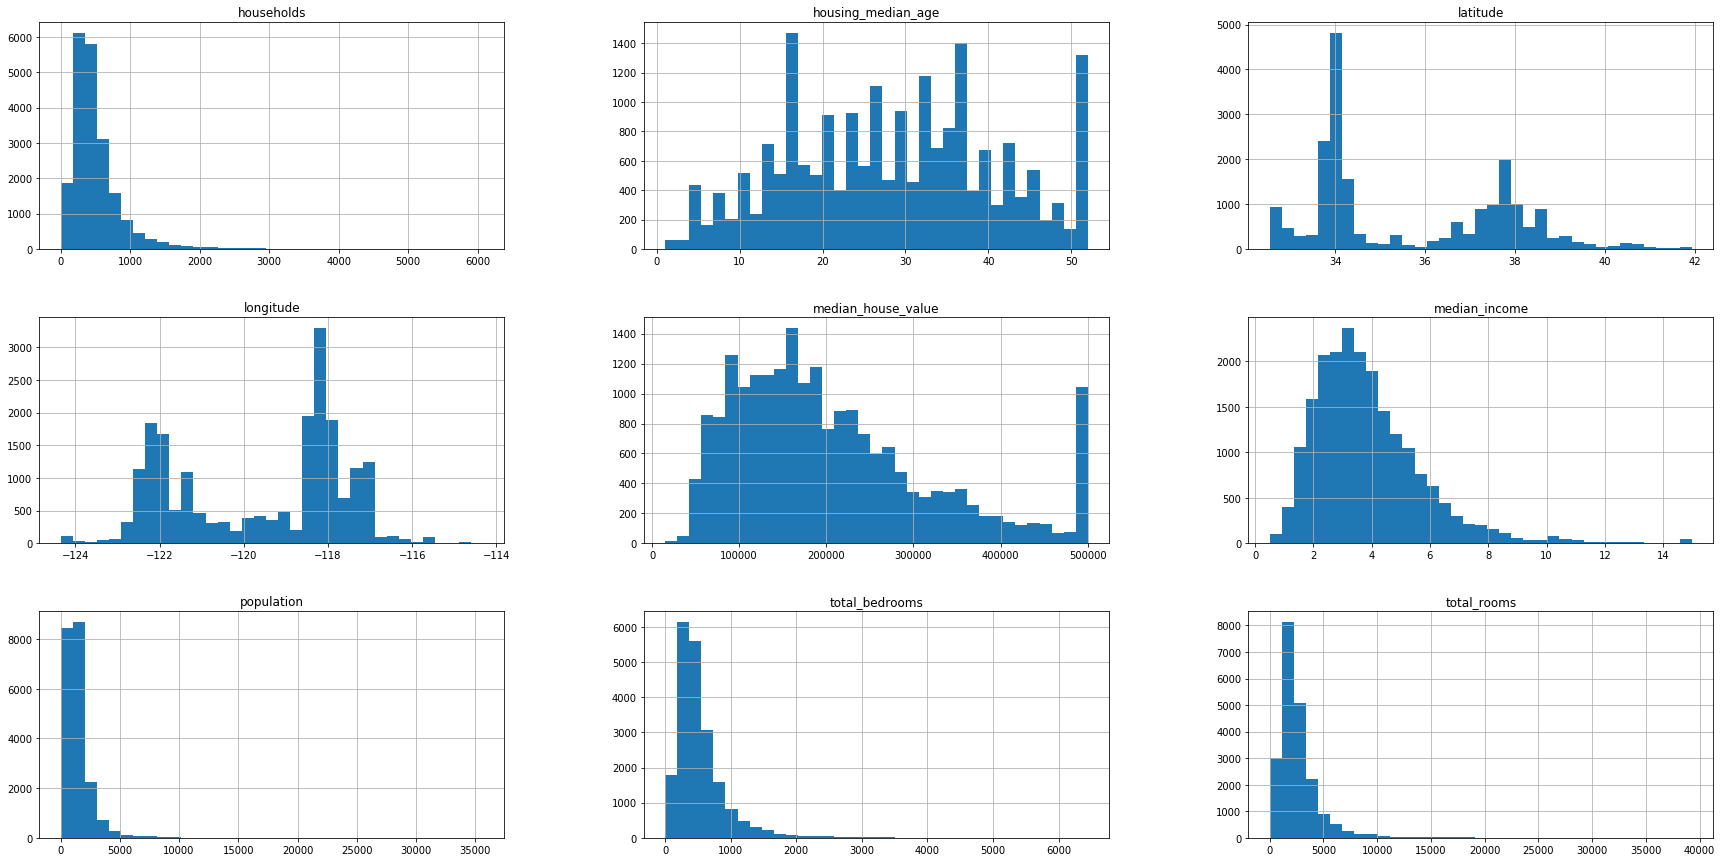

In [6]:
#draw simple histograms
import matplotlib.pyplot as plt
df.hist(bins=35, figsize=(30,15))
plt.show()

## Stratify the sample based on income
First let's check again the distribution of values, then we will create a new categorical income variable (rich, medium, poor). 

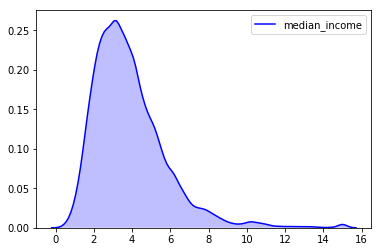

In [8]:
#simple histogram
#df['median_income'].hist(bins= 50)
#plt.show()
import seaborn as sns
#kernel density estimates with seaborn
sns.kdeplot(df.median_income, shade=True, color="b")
plt.show()

medium    0.518508
rich      0.248692
poor      0.232800
Name: income_cat, dtype: float64

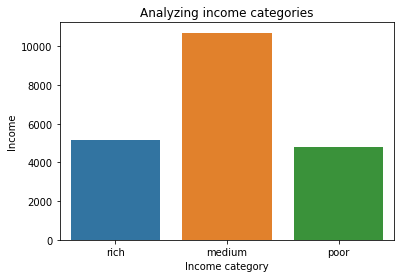

In [58]:
#create three income categories
def cat(x):
    if 0 < x <= 2.5:
        return 'poor'
    elif 2.5 < x <= 4.75:
        return 'medium'
    return 'rich'

df['income_cat'] = df['median_income'].apply(cat)
type(df['income_cat'])

#countplot to see if the categories are balanced
sns.countplot(x='income_cat', data=df)
plt.xlabel("Income category")
plt.ylabel("Income")
plt.title("Analyzing income categories")

df["income_cat"].value_counts() / len(df)

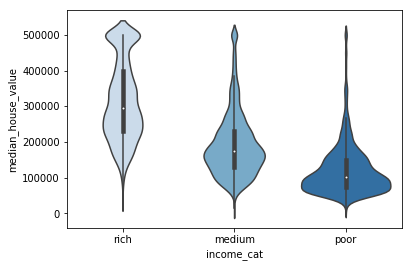

In [59]:
#now use the new variable for a violin plot, to visualize the relationship with house value
sns.violinplot(x=df['income_cat'], y=df['median_house_value'], palette="Blues")

### Compare the division of the dataset between random split and split stratifiedby income 

In [11]:
#split train-test set with scikitlearn (80-20). 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [13]:
from IPython.display import display

#overall
display(df["income_cat"].value_counts() / len(df))
#random split
display(test_set["income_cat"].value_counts() / len(df))
#stratified split
display(strat_test_set["income_cat"].value_counts() / len(df))

medium    0.518508
rich      0.248692
poor      0.232800
Name: income_cat, dtype: float64

medium    0.106105
poor      0.047141
rich      0.046754
Name: income_cat, dtype: float64

medium    0.103682
rich      0.049758
poor      0.046560
Name: income_cat, dtype: float64

In [14]:
# FROM NOW ON I will use a copy of the train set for data exploration
df = strat_train_set.copy()

In [15]:
# this is a scatterplot of geographical data (California long/lat). The dots represent the properties, with urban areas like 
# San Francisco being more populated (bigger radius of the circles). The third variable is the value of the property (red meaning
#higher value, blue lower). In conclusion, the plot shows that houses near the Ocean/in an urban area are worth more 
#(location, location, location!)

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,) 
plt.legend()

#### Correlation Matrix and beyond

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925028,-0.109550,0.043317,0.066894,0.097783,0.050933,-0.017481,-0.048299
latitude,-0.925028,1.000000,0.012832,-0.034592,-0.064285,-0.107190,-0.067097,-0.075995,-0.140075
housing_median_age,-0.109550,0.012832,1.000000,-0.361036,-0.320943,-0.295496,-0.303371,-0.120077,0.104703
total_rooms,0.043317,-0.034592,-0.361036,1.000000,0.931551,0.855523,0.918038,0.194410,0.130552
total_bedrooms,0.066894,-0.064285,-0.320943,0.931551,1.000000,0.875532,0.978587,-0.009350,0.046621
population,0.097783,-0.107190,-0.295496,0.855523,0.875532,1.000000,0.906127,0.001822,-0.028824
households,0.050933,-0.067097,-0.303371,0.918038,0.978587,0.906127,1.000000,0.011256,0.062731
median_income,-0.017481,-0.075995,-0.120077,0.194410,-0.009350,0.001822,0.011256,1.000000,0.687292
median_house_value,-0.048299,-0.140075,0.104703,0.130552,0.046621,-0.028824,0.062731,0.687292,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8E8838C88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F8E8E25A20>]], dtype=object)

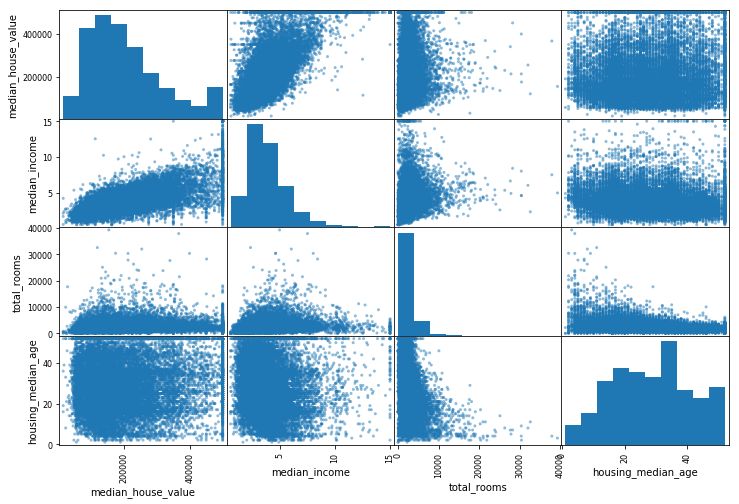

In [20]:
import pandas as pd
corr_matrix= df.corr(method='pearson')
display(corr_matrix)

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
corrm= scatter_matrix(df[attributes], figsize=(12, 8))
display(corrm)

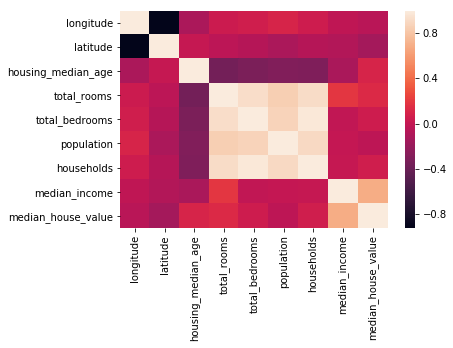

In [16]:
import seaborn as sns
#seabor is a wonderful library featuring a lot of interesting visualization, including violin plot
#if you don't use matplotlib inline, you will have to repeat plt.show every time...
%matplotlib inline
#Plotting a heatmap to visualize the correlation between the variables
sns.heatmap(df.corr())

#### Further VIsualization with seaborn
As to be expected, it seems there is a strong relationship between household income and the value of the house. Let's check it further with seaborn

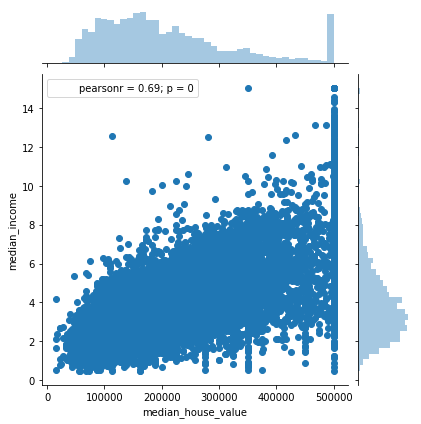

In [17]:
#joinplot to explore the relationship between housing median age and median income (negative strong corr)
sns.jointplot(x='median_house_value', y='median_income', data=df)

#the relationship is clear: the more you earn, the higher the value of your house. However, there is a stange pattern regarding 
#very expensive houses (over 50000), that seem associated even to households with low income. This may be due to the fact that
#the area gained value very fastly from one year to the other, so that even people with low incomes found themselves with 
#high-values properties? 


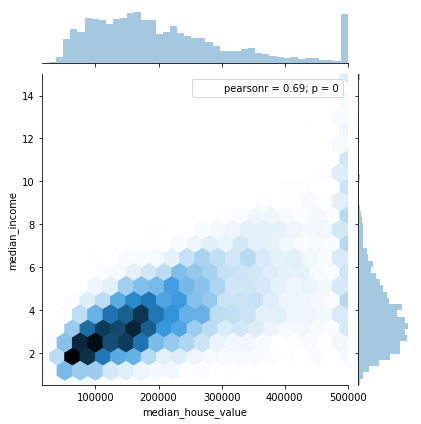

In [18]:
sns.jointplot(x='median_house_value', y='median_income', data=df, kind='hex', gridsize=20)

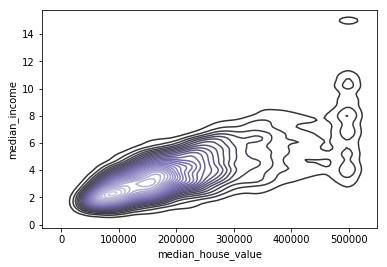

In [19]:
sns.kdeplot(df.median_house_value, df.median_income, n_levels=30, cmap="Purples_d", kind="kde")

In [24]:
# create new attributes and test their potential interest
df["rooms_per_household"] = df["total_rooms"]/ df["households"]
df["bedrooms_per_room"] = df ["total_bedrooms"]/ df["total_rooms"]
df["population_per_household"]= df["population"]/df ["households"]

corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687292
rooms_per_household         0.159082
total_rooms                 0.130552
housing_median_age          0.104703
households                  0.062731
total_bedrooms              0.046621
population_per_household   -0.022986
population                 -0.028824
longitude                  -0.048299
latitude                   -0.140075
bedrooms_per_room          -0.258864
Name: median_house_value, dtype: float64

#### Cleaning data

In [46]:
# apply Imputer method from scikit-learn on numerical variables
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

#define database with only numerical variables
df_num= df.drop(['ocean_proximity', 'income_cat'], axis=1)
#apply Imputer on df_num
imputer.fit(df_num)
# with imputer.statistics_ you can see the median value that the imputer computed for each variable
# you can apply it now to the dataframe
x = imputer.transform(df_num)
# ... and then transform x to a pandas dataframe
df_tr = pd.DataFrame(x, columns= df_num.columns)
df_tr.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-120.22,39.35,8.0,1872.0,281.0,203.0,71.0,4.5882,198400.0,26.366197,0.150107,2.859155
1,-118.01,34.09,29.0,3402.0,747.0,2331.0,690.0,3.6094,179200.0,4.930435,0.219577,3.378261
2,-121.28,37.95,49.0,1200.0,364.0,1448.0,318.0,1.1094,52500.0,3.773585,0.303333,4.553459
3,-118.01,34.10,27.0,2424.0,542.0,1713.0,557.0,3.8085,181400.0,4.351885,0.223597,3.075404
4,-117.03,32.70,19.0,2304.0,572.0,2010.0,556.0,2.2866,109900.0,4.143885,0.248264,3.615108


#### Handling Text and Categorical Attributes

In [71]:
# convert to numerical data the two previously dropped columns with text WITH LABELENCODER
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cat= df['ocean_proximity']
df_cat_encoded = encoder.fit_transform(df_cat)
df_cat_encoded
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


#### Custom Transformers

In [75]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
df_extra_attributes = attr_adder.transform(df.values)

#### Feature Scaling
Features should have the same scale (mean 23000 vs mean 10 does not sound good...). Apply normalization or log transformation to the training set.

In [72]:
# let us apply StandardScaler for standardization (alternative option if interval 0-1 is needed: MinMaxScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_tr)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### Transformation pipelines

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])

df_tr = num_pipeline.fit_transform(df_num)
df_tr

array([[-0.32854113,  1.75533365, -1.65314561, ...,  8.48306172,
        -0.0202246 , -0.965633  ],
       [ 0.77486243, -0.71802234,  0.02005415, ..., -0.20061263,
         0.02506813,  0.08965533],
       [-0.85777541,  1.09702597,  1.61357774, ..., -0.66925505,
         0.12760584,  1.36196751],
       ..., 
       [ 0.64505025, -0.73683113, -1.33444089, ..., -1.60416265,
         0.01572979,  6.06726388],
       [ 0.43036087,  0.09545786, -0.69703146, ...,  5.4153545 ,
        -0.03725497,  1.00830585],
       [-0.89771762,  1.40737102,  0.49811123, ...,  0.49701693,
        -0.0249423 , -0.89146425]])